In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plta
import matplotlib.ticker as ticker
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv (r'C:\אריאל\שנה א\סמסטר א\מבוא למדעי הנתונים\עבודת הגמר\Data_Science_intro_project\Regression\data.csv', index_col = False)

In [3]:
df.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [4]:
df.head()

,שם המוצר,"1 ק""ג",B1 ויטמין,B6 ויטמין,סיבים תזונתיים,חומצה פולית,אנרגיה,חלבונים,פחמימות,שומנים,...,כרום,מוליבדן,1 מטר,100 מטר,בלתי רווי,חומצה לאורית,חומצה לינולאית,DHA,EPA,כלורופיל
0,קלמנטינה,5.9,0.09,0.08,1.7,24.0,47.0,9.0,12.0,0.2,...,0,0,0,0,0,0,0,0,0,0
1,תפוח עץ מוזהב,10.9,0.00,0.00,2.4,0.0,52.0,0.3,13.8,0.2,...,0,0,0,0,0,0,0,0,0,0
2,לימון,6.9,0.00,0.08,2.8,0.0,29.0,1.1,9.3,0.3,...,0,0,0,0,0,0,0,0,0,0
3,תפוז ברשת למיץ,4.9,0.09,0.06,2.5,39.0,49.0,1.0,11.9,0.3,...,0,0,0,0,0,0,0,0,0,0
4,אבוקדו,9.9,0.07,0.30,6.7,81.0,160.0,2.0,8.5,14.7,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9586 entries, 0 to 9585
Columns: 105 entries, שם המוצר to כלורופיל
dtypes: float64(27), int64(74), object(4)
memory usage: 7.7+ MB


In [6]:
df = df.replace('פחות מ 0.5', '0')
df = df.replace('פחות מ 0.1', '0')
df = df.replace('פחות מ 1', '0')
df = df.replace('פחות מ 0.7', '0')
df = df.replace('פחות מ 2.5', '0')
df = df.replace('פחות מ 1.5', '0')
df = df.replace('פחות מ 5', '0')
df = df.replace('פחות מ 0.65', '0')
df = df.replace('פחות מ 0.2', '0')
df = df.replace('פחות מ 2', '0')
df = df.replace('פחות מ 1.1', '0')
df = df.replace('פחות מ 0', '0')
df = df.replace('פחות מ 0.9', '0')
df = df.replace('פחות מ 0.05', '0')

In [7]:
df.select_dtypes(include=['object'])

,שם המוצר,שומנים,חומצות שומן טרנס,כולסטרול
0,קלמנטינה,0.2,0,0
1,תפוח עץ מוזהב,0.2,0,0
2,לימון,0.3,0,0
3,תפוז ברשת למיץ,0.3,0,0
4,אבוקדו,14.7,0,0
...,...,...,...,...
9581,אב.חלבון מי גבינה ט.וניל,2.6,0,0
9582,אב.חלבון מי גבינה שוקולד,2.6,0,0
9583,אבקה חלבון גו טעם,1.2,0,158
9584,אבקה חלבון גו ללא טעם,0,0,165


In [8]:
def convert_type_to_float(category_name, dataframe):
    listt = []
    for prod in dataframe[category_name]:
        listt.append(float(prod))
    df2 = pd.DataFrame({category_name:listt})
    dataframe = dataframe.drop([category_name], axis = 1)
    return df2

In [9]:
adf = convert_type_to_float('חומצות שומן טרנס', df)
bdf = convert_type_to_float('שומנים', df)
cdf = convert_type_to_float('כולסטרול', df)
df['שומנים'] = bdf
df['חומצות שומן טרנס'] = adf
df['כולסטרול'] = cdf
df = df.fillna(0)

In [10]:
df= df.set_index('שם המוצר')

In [11]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

In [12]:
dfprod = train_set.copy()

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(dfprod)
print(imputer.statistics_)
dfprod = dfprod.loc[:, (df != 0).any(axis=0)]

[  0.     0.     0.     0.     0.   225.     5.1   18.5    5.8  120.
   0.     0.     0.     0.     0.     4.95   0.     0.     0.     0.
   1.6    0.     0.     0.     0.     0.     1.5    0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.  ]


In [14]:
#we'll check if there are any products without price units 
unwanted_units = dfprod[(dfprod['100 גרם']==0) & (dfprod['1 ק"ג']==0)].index
print(unwanted_units)
#moreover, we'll check if there are any products with more than one price units 
print(dfprod[(dfprod['100 גרם']!=0) & (dfprod['1 ק"ג']!=0)].index)
#we'll notice that there are 807 with no measurments of price. we'll asume it's a mistake, and remove these two products
dfprod = dfprod.drop(unwanted_units) #droped products with unwanted units
dfprod = dfprod.loc[:, (dfprod != 0).any(axis=0)] #deletes all columns with all values set to zero, such as columns of units that are not 1 ק"ג or 100 גרם
dfprod['1 ק"ג'] = dfprod['1 ק"ג']/10
dfprod['מחיר ל100 גרם'] = dfprod['1 ק"ג'] + dfprod['100 גרם']
dfprod = dfprod.drop(['100 גרם' ,'1 ק"ג'], axis=1)

Index(['חלב בקרטון 3% שומן', 'חומץ יין לבן אורגני 5%', 'שמן זרעי ענבים',
       'משקה קוקוס שקדים אלפרו', 'חטיפי קרח', 'קרם קוקוס 22% ללא גלוטן',
       'רוטב תאילנדי פאד תאי', 'סולגאר סופר גאלה 300', 'רוטב צ'ילי מתוק',
       'שמן קוקוס אורגני',
       ...
       'מארז לחמניה מקמח מלא', 'משקה סויה לל"ס אלפרו', 'משקה סויה בטעם קפה',
       'משקה סויה שוקו אלפרו', 'מגנוקס 520', 'קרם קוקוס 20-22%',
       'רוטב חמוץ מתוק', 'חומץ תפוחים אורגני 5%', 'דונאטס קרם קקאו+סוכריות',
       'מיץ תפוח טבעי'],
      dtype='object', name='שם המוצר', length=807)
Index([], dtype='object', name='שם המוצר')


In [15]:
corr_matrix = dfprod.corr()
corr_matrix["כפיות סוכר"].sort_values(ascending=False)
print(corr_matrix["כפיות סוכר"].sort_values(ascending=False))
#the correlation between "כפיות סוכר" and "סוכרים מתוך פחמימות" is high, beacuse as we found at https://www.camoni.co.il/411804/559434, a nutritionist named Marina Broshi explained that כפיות סוכר = סוכרים מתוך פחמימות/4,
column_1 = dfprod["סוכרים מתוך פחמימות"]
column_2 = dfprod["מחיר ל100 גרם"]
correlation = column_1.corr(column_2)
print("correlation with sugars from carbohydrates ", correlation)
column_1 = dfprod["כפיות סוכר"]
column_2 = dfprod["מחיר ל100 גרם"]
correlation = column_1.corr(column_2)
print("correlation with sugar spoons ", correlation)
dfprod = dfprod.drop(['סוכרים מתוך פחמימות'], axis=1) #the correlation with כפיות סוכר is higher. thus, we'll drop the סוכרים מתוך פחמימות column

כפיות סוכר             1.000000
סוכרים מתוך פחמימות    0.730282
פחמימות                0.355481
אנרגיה                 0.309269
שומנים                 0.143471
                         ...   
נתרן                  -0.058037
רב כהלים              -0.061371
סיבים תזונתיים        -0.064910
חלבונים               -0.075351
סידן                  -0.092343
Name: כפיות סוכר, Length: 85, dtype: float64
correlation with sugars from carbohydrates  0.02458385283314243
correlation with sugar spoons  0.03587987748484339


In [16]:
corr_matrix = dfprod.corr()
corr_matrix["אנרגיה"].sort_values(ascending=False)
print(corr_matrix["אנרגיה"].sort_values(ascending=False))
#the correlation between "כפיות סוכר" and "סוכרים מתוך פחמימות" is high, beacuse as we found at wikipedia, https://he.wikipedia.org/wiki/%D7%A7%D7%9C%D7%95%D7%A8%D7%99%D7%94, energy, which is Calories can be calculated by: גרם שומן=אנרגיה*9
column_1 = dfprod["אנרגיה"]
column_2 = dfprod["מחיר ל100 גרם"]
correlation = column_1.corr(column_2)
print("correlation with energy ", correlation)
column_1 = dfprod["שומנים"]
column_2 = dfprod["מחיר ל100 גרם"]
correlation = column_1.corr(column_2)
print("correlation with faness ", correlation)
dfprod = dfprod.drop(['אנרגיה'], axis=1) #the correlation with שומנים is higher. thus, we'll drop the אנרגיה column

אנרגיה                 1.000000
שומנים                 0.754824
פחמימות                0.438441
כפיות סוכר             0.309269
סיבים תזונתיים         0.225560
                         ...   
חומצת שומן לינולאית   -0.048991
C ויטמין              -0.052437
כלור                  -0.052869
ARA חומצת שומן        -0.056495
נתרן                  -0.115966
Name: אנרגיה, Length: 84, dtype: float64
correlation with energy  0.03764732547906756
correlation with faness  0.0832284127018353


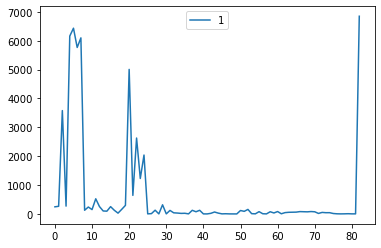

In [17]:
df_num = []
df_name = []
for col in dfprod.columns:
    df_num.append(int(dfprod[col].astype(bool).sum(axis=0)))
    df_name.append(col)
df2 = pd.DataFrame([df_name, df_num]).transpose()
ax = df2.plot(x_compat=True)
ax.xaxis.set_major_locator(ticker.MaxNLocator()) #Dynamically finds major tick positions
plta.show() #in order to check which features can be given up
#it seems that starting from feature number 30, we can give up on those features
#it actually makes sense, because when we did the web scraping, it added to the keys, the names of the columns, 
#a name each time it was not already there. therefore, we would expect the common keys to be at the beginning of the columns

In [18]:
dfprod['סיבים תזונתיים'] = dfprod['סיבים תזונתיים']+dfprod['סיבים תזונתים'] #found two columns with the same kind of values, typo in one of the column names
dfprod = dfprod.drop(['סיבים תזונתים'], axis = 1)

In [19]:
dfprod2 = dfprod.iloc[:,:30] #we'll try creating a new train-set, with only the first 31 features, and put it aside for now
dfprod2['מחיר ל100 גרם'] = dfprod['מחיר ל100 גרם']
unwanted_units = np.array([])
unwanted_units = set(unwanted_units) #all number of rows without duplicates
dfprod2 = dfprod2.drop(unwanted_units)
dfprod2 = dfprod2.loc[:, (dfprod2 != 0).any(axis=0)] #deletes all columns with all values set to zero
dfprod2

,B1 ויטמין,B6 ויטמין,סיבים תזונתיים,חומצה פולית,חלבונים,פחמימות,שומנים,נתרן,B3 ויטמין,אשלגן,...,כפיות סוכר,סידן,כולסטרול,שומן חד בלתי רווי,שומן רב בלתי רווי,סוכרים,נתרן מופחת,רב כהלים,לקטוז,מחיר ל100 גרם
שם המוצר,,,,,,,,,,,,,,,,,,,,,
"ופל בלגי טעם לימון ללת""ס",0.000,0.0,0.00,0.00,0.80,9.20,6.30,17.5,0.0,0,...,0.00,0.0,0.0,0,0,0,0,4,0,4.95
פסטה פרפקטו קסרצ'ה,0.000,0.0,1.60,0.00,0.00,0.00,0.00,0.0,0.0,0,...,0.00,0.0,0.0,0,0,0,0,0,0,1.38
פיטריות שמפניון שלמות,0.000,0.0,2.20,0.00,2.10,0.90,0.00,240.0,0.0,0,...,0.00,0.0,0.0,0,0,0,0,0,0,1.65
לחם קל מכוסמין מלא,0.000,0.0,2.45,0.00,3.07,8.46,0.39,86.9,0.0,0,...,0.00,0.0,0.0,0,0,0,0,0,0,3.90
בייבי ביס טעם ירקות,0.000,0.0,0.00,0.00,0.00,2.00,0.00,6.0,0.0,0,...,0.00,0.0,0.0,0,0,0,0,0,0,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
סוכריות הריבו האפי קולה,0.000,0.0,0.00,0.00,6.30,76.00,0.00,0.0,0.0,0,...,11.25,0.0,0.0,0,0,0,0,0,0,9.86
סלים דליס רב דגנים חלב,0.055,0.1,1.60,7.22,0.80,7.40,2.60,36.4,0.7,0,...,8.75,0.0,0.0,0,0,0,0,0,0,9.08
שוקולד עם סוכריות קופצות,0.000,0.0,0.00,0.00,8.10,58.00,27.00,117.0,0.0,0,...,14.25,0.0,29.0,0,0,0,0,0,0,6.11


In [20]:
dfprod = dfprod.reset_index()
dfprod

,שם המוצר,B1 ויטמין,B6 ויטמין,סיבים תזונתיים,חומצה פולית,חלבונים,פחמימות,שומנים,נתרן,B3 ויטמין,...,כלור,קרניטין,כלוריד,חומצת שומן AA,ויטמין B3 ניקוטינאמיד שווי חומ,K אשלגן,לחות,כרום,מוליבדן,מחיר ל100 גרם
0,"ופל בלגי טעם לימון ללת""ס",0.000,0.0,0.00,0.00,0.80,9.20,6.30,17.5,0.0,...,0,0,0,0,0,0,0,0,0,4.95
1,פסטה פרפקטו קסרצ'ה,0.000,0.0,1.60,0.00,0.00,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.38
2,פיטריות שמפניון שלמות,0.000,0.0,2.20,0.00,2.10,0.90,0.00,240.0,0.0,...,0,0,0,0,0,0,0,0,0,1.65
3,לחם קל מכוסמין מלא,0.000,0.0,2.45,0.00,3.07,8.46,0.39,86.9,0.0,...,0,0,0,0,0,0,0,0,0,3.90
4,בייבי ביס טעם ירקות,0.000,0.0,0.00,0.00,0.00,2.00,0.00,6.0,0.0,...,0,0,0,0,0,0,0,0,0,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842,סוכריות הריבו האפי קולה,0.000,0.0,0.00,0.00,6.30,76.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,9.86
6843,סלים דליס רב דגנים חלב,0.055,0.1,1.60,7.22,0.80,7.40,2.60,36.4,0.7,...,0,0,0,0,0,0,0,0,0,9.08
6844,שוקולד עם סוכריות קופצות,0.000,0.0,0.00,0.00,8.10,58.00,27.00,117.0,0.0,...,0,0,0,0,0,0,0,0,0,6.11
6845,פרוסות מוצרלה מעושנת,0.000,0.0,0.00,0.00,21.50,0.00,22.00,500.0,0.0,...,0,0,0,0,0,0,0,0,0,9.25


In [21]:
#back with the original dataframe
arr = np.array([])
for col in dfprod.columns:
    if dfprod[col].astype(bool).sum(axis=0)<50: #all the features that less than precent of the products have
        arr = np.append(arr, dfprod[col].to_numpy().nonzero()) 
print(arr)
arr = set(arr) #all number of rows without duplicates
for i in arr:
    dfprod = dfprod.drop(i)
dfprod = dfprod.loc[:, (dfprod != 0).any(axis=0)] #deletes all columns with all values set to zero
dfprod = dfprod.set_index(['שם המוצר'])
dfprod

[2329. 4385. 4734.  340. 2329. 2524. 2601. 2755. 3398. 4734. 5092. 5253.
 5638. 6407. 1554. 6446. 1286. 1554. 2084.   28.  221.  233.  262.  266.
  377.  422.  506.  528.  529.  559. 1409. 1482. 1673. 2004. 2088. 2516.
 2612. 2684. 3126. 3264. 3380. 3389. 3703. 3704. 3812. 3972. 4377. 4455.
 4548. 4642. 4724. 5593. 5727. 5730. 5912. 6164. 6790. 6840.   28.   65.
  221.  233.  262.  266.  377.  529. 1009. 1409. 1449. 1864. 2004. 2703.
 3126. 3264. 3349. 3380. 3532. 3536. 3812. 3869. 4020. 4317. 4797. 4891.
 5418. 5589. 5593. 5912. 6164.  294.  585.  834.  983. 1046. 1315. 2617.
 3091. 3829. 3926. 3937. 4567. 4783. 5097. 5139. 5682. 6177. 6514. 6741.
  176.  337.  954. 2159. 2203. 2345. 2438. 2520. 2542. 2547. 2908. 3766.
 3967. 4218. 4229. 4597. 4969. 5128. 5945. 6014. 6621. 6784. 6809.  588.
 3506. 4991. 5612. 6033. 5612.  180.  571.  589.  945. 1047. 1064. 1474.
 2490. 2626. 3865. 4002. 4117. 4170. 4822. 4976. 5095. 5492. 5652. 6267.
 6385. 6745.   94.  288.  336.  989. 1775. 2018. 23

,B1 ויטמין,B6 ויטמין,סיבים תזונתיים,חומצה פולית,חלבונים,פחמימות,שומנים,נתרן,B3 ויטמין,אשלגן,...,זרחן,מנגן,ויטמין E שווי אלפא טוקופרול,חומצה אסקורבית,סלניום,נחושת,כולין,אינוסיטול,חומצה אלפא לינולנית,מחיר ל100 גרם
שם המוצר,,,,,,,,,,,,,,,,,,,,,
"ופל בלגי טעם לימון ללת""ס",0.000,0.0,0.00,0.00,0.80,9.20,6.30,17.5,0.0,0,...,0,0,0,0,0,0,0,0,0,4.95
פסטה פרפקטו קסרצ'ה,0.000,0.0,1.60,0.00,0.00,0.00,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1.38
פיטריות שמפניון שלמות,0.000,0.0,2.20,0.00,2.10,0.90,0.00,240.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1.65
לחם קל מכוסמין מלא,0.000,0.0,2.45,0.00,3.07,8.46,0.39,86.9,0.0,0,...,0,0,0,0,0,0,0,0,0,3.90
בייבי ביס טעם ירקות,0.000,0.0,0.00,0.00,0.00,2.00,0.00,6.0,0.0,0,...,0,0,0,0,0,0,0,0,0,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
סוכריות הריבו האפי קולה,0.000,0.0,0.00,0.00,6.30,76.00,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,9.86
סלים דליס רב דגנים חלב,0.055,0.1,1.60,7.22,0.80,7.40,2.60,36.4,0.7,0,...,0,0,0,0,0,0,0,0,0,9.08
שוקולד עם סוכריות קופצות,0.000,0.0,0.00,0.00,8.10,58.00,27.00,117.0,0.0,0,...,0,0,0,0,0,0,0,0,0,6.11


In [22]:
def variance_threshold_selector(data, threshold=(0.8 * (1 - .8))):
    selector = VarianceThreshold(threshold) #VarianceThreshold removes all low-variance features.
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [23]:
dfprod = variance_threshold_selector(dfprod, threshold=(0.8 * (1 - .8)))
dfprod

,B1 ויטמין,סיבים תזונתיים,חומצה פולית,חלבונים,פחמימות,שומנים,נתרן,B3 ויטמין,אשלגן,C ויטמין,...,ניאצין,חומצות שומן רווי,ביוטין,יוד,זרחן,מנגן,חומצה אסקורבית,נחושת,חומצה אלפא לינולנית,מחיר ל100 גרם
שם המוצר,,,,,,,,,,,,,,,,,,,,,
"ופל בלגי טעם לימון ללת""ס",0.000,0.00,0.00,0.80,9.20,6.30,17.5,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,4.95
פסטה פרפקטו קסרצ'ה,0.000,1.60,0.00,0.00,0.00,0.00,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1.38
פיטריות שמפניון שלמות,0.000,2.20,0.00,2.10,0.90,0.00,240.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1.65
לחם קל מכוסמין מלא,0.000,2.45,0.00,3.07,8.46,0.39,86.9,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,3.90
בייבי ביס טעם ירקות,0.000,0.00,0.00,0.00,2.00,0.00,6.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
סוכריות הריבו האפי קולה,0.000,0.00,0.00,6.30,76.00,0.00,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,9.86
סלים דליס רב דגנים חלב,0.055,1.60,7.22,0.80,7.40,2.60,36.4,0.7,0,0.0,...,0,0,5,0,0,0,0,0,0,9.08
שוקולד עם סוכריות קופצות,0.000,0.00,0.00,8.10,58.00,27.00,117.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,6.11


In [24]:
dfprod2 = variance_threshold_selector(dfprod2, threshold=(0.8 * (1 - .8)))
dfprod2 #noticed that only three feature fell in this data set!

,B1 ויטמין,סיבים תזונתיים,חומצה פולית,חלבונים,פחמימות,שומנים,נתרן,B3 ויטמין,אשלגן,C ויטמין,...,אבץ,מתוכם סוכר מוסף,מתוכם שומן רווי,חומצות שומן טרנס,כפיות סוכר,סידן,כולסטרול,סוכרים,רב כהלים,מחיר ל100 גרם
שם המוצר,,,,,,,,,,,,,,,,,,,,,
"ופל בלגי טעם לימון ללת""ס",0.000,0.00,0.00,0.80,9.20,6.30,17.5,0.0,0,0.0,...,0.0,0.0,3.30,0.00,0.00,0.0,0.0,0,4,4.95
פסטה פרפקטו קסרצ'ה,0.000,1.60,0.00,0.00,0.00,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,1.38
פיטריות שמפניון שלמות,0.000,2.20,0.00,2.10,0.90,0.00,240.0,0.0,0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,1.65
לחם קל מכוסמין מלא,0.000,2.45,0.00,3.07,8.46,0.39,86.9,0.0,0,0.0,...,0.0,0.0,0.12,0.00,0.00,0.0,0.0,0,0,3.90
בייבי ביס טעם ירקות,0.000,0.00,0.00,0.00,2.00,0.00,6.0,0.0,0,0.0,...,0.0,0.0,0.10,0.00,0.00,0.0,0.0,0,0,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
סוכריות הריבו האפי קולה,0.000,0.00,0.00,6.30,76.00,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0.00,0.00,11.25,0.0,0.0,0,0,9.86
סלים דליס רב דגנים חלב,0.055,1.60,7.22,0.80,7.40,2.60,36.4,0.7,0,0.0,...,0.0,0.0,1.40,0.00,8.75,0.0,0.0,0,0,9.08
שוקולד עם סוכריות קופצות,0.000,0.00,0.00,8.10,58.00,27.00,117.0,0.0,0,0.0,...,0.0,0.0,16.50,0.00,14.25,0.0,29.0,0,0,6.11


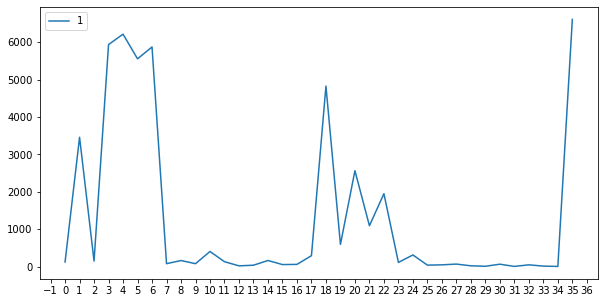

In [25]:
df_num = []
df_name = []
for col in dfprod.columns:
    df_num.append(int(dfprod[col].astype(bool).sum(axis=0)))
    df_name.append(col)
df2 = pd.DataFrame([df_name, df_num]).transpose()
ax = df2.plot(x_compat=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator()) #Dynamically finds major tick positions
plta.gcf().set_size_inches(10, 5)
plta.show() #in order to check which features can be given up
#it seems that we shoul pick the next features:
#no. 1, 3-7(not including 7), 18, 20, 21, 22, 35

In [26]:
ss= [1 ,3, 4, 5, 6 ,18, 20, 21, 22, 35]
dfprod3 = dfprod.iloc[:, ss]
dfprod3 #the idea behind taking the features with more than 1000 non-zero values is that as long as the feature is appearing more
#it can help us to be more accurate for a bigger complex of producrs

,סיבים תזונתיים,חלבונים,פחמימות,שומנים,נתרן,מתוכם שומן רווי,כפיות סוכר,סידן,כולסטרול,מחיר ל100 גרם
שם המוצר,,,,,,,,,,
"ופל בלגי טעם לימון ללת""ס",0.00,0.80,9.20,6.30,17.5,3.30,0.00,0.0,0.0,4.95
פסטה פרפקטו קסרצ'ה,1.60,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,1.38
פיטריות שמפניון שלמות,2.20,2.10,0.90,0.00,240.0,0.00,0.00,0.0,0.0,1.65
לחם קל מכוסמין מלא,2.45,3.07,8.46,0.39,86.9,0.12,0.00,0.0,0.0,3.90
בייבי ביס טעם ירקות,0.00,0.00,2.00,0.00,6.0,0.10,0.00,0.0,0.0,25.00
...,...,...,...,...,...,...,...,...,...,...
סוכריות הריבו האפי קולה,0.00,6.30,76.00,0.00,0.0,0.00,11.25,0.0,0.0,9.86
סלים דליס רב דגנים חלב,1.60,0.80,7.40,2.60,36.4,1.40,8.75,0.0,0.0,9.08
שוקולד עם סוכריות קופצות,0.00,8.10,58.00,27.00,117.0,16.50,14.25,0.0,29.0,6.11


In [27]:
corr_matrix = dfprod3.corr()
corr_matrix['מחיר ל100 גרם'].sort_values(ascending=False)

מחיר ל100 גרם      1.000000
שומנים             0.082895
כפיות סוכר         0.037329
כולסטרול           0.036384
סידן               0.020809
נתרן               0.014904
מתוכם שומן רווי    0.008381
חלבונים            0.006832
סיבים תזונתיים    -0.001554
פחמימות           -0.034192
Name: מחיר ל100 גרם, dtype: float64

# end of data cleaning

In [28]:
'''t2_col = []
t2_index = train_set2.index.values.tolist()
t1_col = []
t1_index = train_set1.index.values.tolist()
for col in train_set2.columns:
    t2_col.append(col)
for col in train_set1.columns:
    t1_col.append(col)
scaler = MinMaxScaler()
train_set1 = scaler.fit_transform(train_set1)
train_set2 = scaler.fit_transform(train_set2)
train_set2 = pd.DataFrame(train_set2, index=t2_index, columns=t2_col)
train_set1 = pd.DataFrame(train_set1, index=t1_index, columns=t1_col)'''

't2_col = []\nt2_index = train_set2.index.values.tolist()\nt1_col = []\nt1_index = train_set1.index.values.tolist()\nfor col in train_set2.columns:\n    t2_col.append(col)\nfor col in train_set1.columns:\n    t1_col.append(col)\nscaler = MinMaxScaler()\ntrain_set1 = scaler.fit_transform(train_set1)\ntrain_set2 = scaler.fit_transform(train_set2)\ntrain_set2 = pd.DataFrame(train_set2, index=t2_index, columns=t2_col)\ntrain_set1 = pd.DataFrame(train_set1, index=t1_index, columns=t1_col)'

In [29]:
products1 = dfprod.drop("מחיר ל100 גרם", axis=1)
products_prices1 = dfprod["מחיר ל100 גרם"].copy()
products2 = dfprod2.drop("מחיר ל100 גרם", axis=1)
products_prices2 = dfprod2["מחיר ל100 גרם"].copy()
products3 = dfprod3.drop("מחיר ל100 גרם", axis=1)
products_prices3 = dfprod3["מחיר ל100 גרם"].copy()

In [30]:
products3

,סיבים תזונתיים,חלבונים,פחמימות,שומנים,נתרן,מתוכם שומן רווי,כפיות סוכר,סידן,כולסטרול
שם המוצר,,,,,,,,,
"ופל בלגי טעם לימון ללת""ס",0.00,0.80,9.20,6.30,17.5,3.30,0.00,0.0,0.0
פסטה פרפקטו קסרצ'ה,1.60,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
פיטריות שמפניון שלמות,2.20,2.10,0.90,0.00,240.0,0.00,0.00,0.0,0.0
לחם קל מכוסמין מלא,2.45,3.07,8.46,0.39,86.9,0.12,0.00,0.0,0.0
בייבי ביס טעם ירקות,0.00,0.00,2.00,0.00,6.0,0.10,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
סוכריות הריבו האפי קולה,0.00,6.30,76.00,0.00,0.0,0.00,11.25,0.0,0.0
סלים דליס רב דגנים חלב,1.60,0.80,7.40,2.60,36.4,1.40,8.75,0.0,0.0
שוקולד עם סוכריות קופצות,0.00,8.10,58.00,27.00,117.0,16.50,14.25,0.0,29.0


In [31]:
'''p1_col = []
p1_index = products1.index.values.tolist()
for col in products1.columns:
    p1_col.append(col)
scaled_features1 = StandardScaler().fit_transform(products1.values)
products_preapered1 = pd.DataFrame(scaled_features1, index=p1_index, columns=p1_col)
p3_col = []
p3_index = products3.index.values.tolist()
for col in products3.columns:
    p3_col.append(col)
scaled_features3 = StandardScaler().fit_transform(products3.values)
products_preapered3 = pd.DataFrame(scaled_features3, index=p3_index, columns=p3_col)
p2_col = []
p2_index = products2.index.values.tolist()
for col in products2.columns:
    p2_col.append(col)
scaled_features2 = StandardScaler().fit_transform(products2.values)
products_preapered2 = pd.DataFrame(scaled_features2, index=p2_index, columns=p2_col)
products_preapered3'''

'p1_col = []\np1_index = products1.index.values.tolist()\nfor col in products1.columns:\n    p1_col.append(col)\nscaled_features1 = StandardScaler().fit_transform(products1.values)\nproducts_preapered1 = pd.DataFrame(scaled_features1, index=p1_index, columns=p1_col)\np3_col = []\np3_index = products3.index.values.tolist()\nfor col in products3.columns:\n    p3_col.append(col)\nscaled_features3 = StandardScaler().fit_transform(products3.values)\nproducts_preapered3 = pd.DataFrame(scaled_features3, index=p3_index, columns=p3_col)\np2_col = []\np2_index = products2.index.values.tolist()\nfor col in products2.columns:\n    p2_col.append(col)\nscaled_features2 = StandardScaler().fit_transform(products2.values)\nproducts_preapered2 = pd.DataFrame(scaled_features2, index=p2_index, columns=p2_col)\nproducts_preapered3'

In [32]:
'''from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(products_preapered1, products_prices1)
some_data = products_preapered1.iloc[69:925]
some_labels = products_prices1.iloc[69:925]
print("predicitions:", lin_reg.predict(some_data))
print("lables:", list(some_labels))
from sklearn.metrics import mean_squared_error
predictions1 = lin_reg.predict(products_preapered1)
lin_mse = mean_squared_error(products_prices1, predictions1)
lin_rmse = np.sqrt(lin_mse)
lin_rmse'''

'from sklearn.linear_model import LinearRegression\nlin_reg = LinearRegression()\nlin_reg.fit(products_preapered1, products_prices1)\nsome_data = products_preapered1.iloc[69:925]\nsome_labels = products_prices1.iloc[69:925]\nprint("predicitions:", lin_reg.predict(some_data))\nprint("lables:", list(some_labels))\nfrom sklearn.metrics import mean_squared_error\npredictions1 = lin_reg.predict(products_preapered1)\nlin_mse = mean_squared_error(products_prices1, predictions1)\nlin_rmse = np.sqrt(lin_mse)\nlin_rmse'

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(products1, products_prices1)
some_data = products1.iloc[69:925]
some_labels = products_prices1.iloc[69:925]
print("predicitions:", lin_reg.predict(some_data))
print("lables:", list(some_labels))
from sklearn.metrics import mean_squared_error
predictions1 = lin_reg.predict(products1)
lin_mse = mean_squared_error(products_prices1, predictions1)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

predicitions: [ 7.83726304  5.74984327  6.27319829  7.00256591 13.74187252  6.69030363
  7.74432555  6.93036532  9.51370014  5.51147088  7.02146905  6.24901949
  7.3394375   5.42674953  5.07882403  7.87782163  4.76649126  5.86824307
  7.18735248  6.83818051  6.24718524  6.16595669  5.90753088 14.69941487
  6.32317321  9.0372429   4.51500673  7.47479853  5.82085554  7.57212534
  8.55391559  6.69908114  5.64451625  4.86079232  8.34679943  6.26900318
  7.36539785  5.01214178  8.83411857  6.65386156  6.47509365  3.84007575
  6.2208416   7.79796202  6.90495995 14.82372219  9.14764034  9.41393301
  6.78553821  7.00013637  9.27120564  7.97877281  6.40352434 14.47681279
  6.8473941   5.13491016 15.35422967  7.01315208  6.90766711  3.80910813
  6.75711163  7.25650543  8.52942156  5.03573239  6.96156497  3.95679559
  7.12804496  8.07245511  6.64327344  6.91253639  5.44251468  7.5050942
  7.10132376  6.69089327  6.68392137  6.60002705  6.24509216  6.84567401
  9.98926481  6.95873827  7.19189233  

10.008128252230854

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(products2, products_prices2)
some_data = products2.iloc[:5]
some_labels =products_prices2.iloc[:5]
print("predicitions:", lin_reg.predict(some_data))
print("lables:", list(some_labels))
predictions2 = lin_reg.predict(products2)
lin_mse = mean_squared_error(products_prices2, predictions2)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

predicitions: [7.39800173 6.79724862 6.81413518 6.6275876  6.67695024]
lables: [4.95, 1.38, 1.65, 3.9, 25.0]
9.890293287807504


In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(products3, products_prices3)
some_data = products3.iloc[69:925]
some_labels = products_prices3.iloc[69:925]
print("predicitions:", lin_reg.predict(some_data))
print("lables:", list(some_labels))
from sklearn.metrics import mean_squared_error
predictions3 = lin_reg.predict(products3)
lin_mse = mean_squared_error(products_prices3, predictions3)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

predicitions: [ 7.93505519  6.17418363  7.16056717  6.99005821  5.82184158  7.42115198
  7.94320138  6.98183598  9.17578368  6.11335887  7.0561528   6.69826452
  7.34620202  6.11956827  7.73502695  7.97649563  5.66751781  6.26405678
  7.39455812  6.89194224  6.60173338  6.47598747  6.05446591  5.69929791
  6.62528603  8.75210693  5.4932524   7.68122364  6.48230233  8.04720329
  8.68200587  6.73817413  6.38921347  7.39379152  8.04072138  6.48382612
  7.47726546  5.55261174  8.80727798  6.73244413  6.51442692  5.60329808
  6.57654648  8.00416015  6.85108288  5.69947954  8.86961305  9.29244561
  7.17789241  7.4171894   8.88117723  8.06631761  6.95145809  5.5756896
  7.54438358  5.8905375   5.57220841  7.43636843  6.96036161  6.66327539
  6.88766978  7.17622294  8.43321887  5.81683892  6.9979539   6.48599565
  7.24670238  7.13065391  6.8210322   6.87241645  6.15425199  7.8309213
  7.13266209  6.75210907  6.68031425  6.65251743  6.97050613  6.87896377
  9.57964111  6.99639583  7.75738865  9

10.14686293019003

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(products1,products_prices1)
predictionst1 = tree_reg.predict(products1)
tree_mse = mean_squared_error(products_prices3, predictionst1)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

2.419732689826675


In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(products2,products_prices2)
predictionst2 = tree_reg.predict(products2)
tree_mse = mean_squared_error(products_prices2, predictionst2)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

2.39078918253634


In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(products3,products_prices3)
predictionst3 = tree_reg.predict(products3)
tree_mse = mean_squared_error(products_prices3, predictionst3)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

2.44298333879508


In [39]:
'''from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(products_preapered3,products_prices3)
predictionst3 = tree_reg.predict(products_preapered3)
tree_mse = mean_squared_error(products_prices3, predictionst3)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)'''

'from sklearn.tree import DecisionTreeRegressor\ntree_reg = DecisionTreeRegressor()\ntree_reg.fit(products_preapered3,products_prices3)\npredictionst3 = tree_reg.predict(products_preapered3)\ntree_mse = mean_squared_error(products_prices3, predictionst3)\ntree_rmse = np.sqrt(tree_mse)\nprint(tree_rmse)'